# Projeto 2 - Predição 

### Nomes:
Leandra Ferreira Fontes
<br>Tainá Pereira de Bonfim <br>

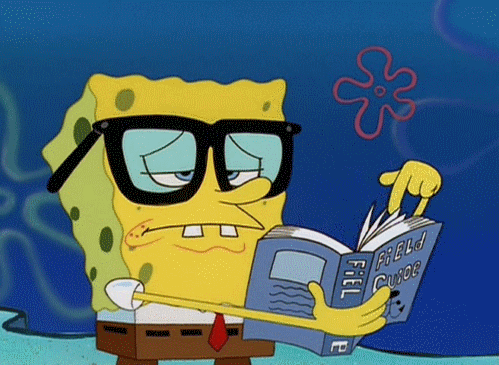

## Parte A - Introdução 


#### carregando as bibliotecas necessárias 

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import seaborn as sns

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.
from sklearn import tree
import statsmodels.api as sm

#### verificando o repositório 

In [5]:
import os
print(f'Esperamos trabalhar no diretório: \n{os.getcwd()}\n')



Esperamos trabalhar no diretório: 
C:\Users\taina\OneDrive\Área de Trabalho\socorro\22-1b-cd-p2-leandra_taina-1



#### carregando a base de Dados

In [6]:
dados = pd.read_csv('dados.csv')
dados=dados.dropna()  #retirando as linhas sem informações 
#dados.isnull().sum()
print("O tamanho da base de dados é de ", len(dados))

O tamanho da base de dados é de  10642


### Objetivo
Buscamos compreender como fatores como autor, número de páginas de um livro, dentre outros, podem influenciar no abandono ou não de um livro,onde esse abandono está representado por uma variável quantitativa , que indica quantas pessoas abandoram aquele livro, segundo a nossa base de dados. Para isso utilizamos os seguintes features listados abaixo:

<ul> <li> ano: Ano em que o livro foi publicado </li> 
<li> Paginas: Número de páginas do livro </li> 
<li>  rating: Média das avaliações </li>
<li>avaliacao: Quantidade de avaliações</li> 
<li>resenha: Quantidade de resenhas no skoob</li>
<li> <b> abandonos: Quantidade de pessoas que abandonaram a leitura (Nossa target)</b> </li>
<li>relendo: Quantidade de pessoas que estão relendo esse livro</li>
<li>querem_ler: Quantidade de pessoas que querem ler esse livro</li>
<li>lendo: Quantidade de pessoas que estão lendo esse livro</li>
<li>leram: Quantidade de pessoas que leram esse livro</li>
<li>male: Porcentagem de leitores do sexo masculinos</li>
<li>editora: Editora que publicou o livro</li>
<li>autor: Autor que publicou o livro</li>    
<li>descricao: Breve descrição do livro</li> 
<li>female: Porcentagem de leitoras do sexo feminino</li></ul>


#### Base de dados utilizada:
Acesse o link abaixo: 

https://www.kaggle.com/datasets/victorstein/livros-skoob 

#### Conhecendo o nosso Data Frame 
Aqui expomos o data Frame para explorar seus dados a respeito de cada feature e analisar se havia dados a serem excluídos, ou seja, dados que inteferissem, negativamente, no nosso modelo. A exemplo, dados como 0 para o ano, pois não existe ano 0, foram excluídos logo em seguida. 

In [7]:
dados.head()


,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Orçamento sem falhas,Nath Finanças,9.786556e+12,6555601566,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72
1,Minha Sombria Vanessa,Kate Elizabeth Russell,9.788551e+12,8551006274,2020,432,português,Intrínseca,4.3,2,653,48,3,6,389,2,Elogiado por Gillian Flynn e considerado um do...,Drama / Ficção / Literatura Estrangeira / Susp...,7,93
2,Recursão,Blake Crouch,9.788551e+12,8551005375,2020,320,português,Intrínseca,4.4,2,618,22,2,6,295,2,E se um dia memórias vívidas de coisas que nun...,Ficção / Ficção científica / Literatura Estran...,21,79
3,"M, o Filho do Século",Antonio Scurati,9.788551e+12,855100607X,2020,816,português,Intrínseca,4.6,60,12,1,0,951,49,55,"O romance M, o Filho do Século conta em trama ...","Biografia, Autobiografia, Memórias / História ...",37,63
4,Oblivion Song: Entre Dois Mundos,Robert Kirkman,9.788551e+12,8551006258,2020,136,português,Intrínseca,4.1,166,16,0,0,376,6,184,Mestre em traçar universos distópicos permeado...,"Ficção / HQ, comics, mangá / Literatura Estran...",44,56


Aqui utilizamos o 'describe' para analisar as frequências para cada feature.

In [8]:
dados.describe()

,ISBN_13,ano,paginas,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,male,female
count,1.064200e+04,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000
mean,9.785962e+12,2009.246664,280.068408,3.859500,122.017196,50.500094,37.996053,10.640387,152.303890,53.538433,129.113043,26.246476,73.177786
std,1.461899e+11,58.905509,165.168242,0.708709,205.440090,125.526660,118.393596,60.553771,234.507585,129.305753,208.438098,19.427422,20.116669
min,8.551005e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.788533e+12,2007.000000,176.000000,3.600000,6.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,10.000000,61.000000
50%,9.788551e+12,2012.000000,260.000000,4.000000,26.000000,5.000000,3.000000,0.000000,35.000000,8.000000,31.000000,23.000000,76.000000
75%,9.788579e+12,2016.000000,352.000000,4.200000,130.000000,33.000000,16.000000,2.000000,195.000000,38.000000,146.000000,38.000000,89.000000
max,9.999097e+12,2021.000000,4606.000000,10.000000,999.000000,985.000000,993.000000,877.000000,999.000000,994.000000,999.000000,100.000000,100.000000


## Análise exploratória 
Aqui começaremos a analisar nosso conjunto de dados e entender suas principais características, usando métodos de visualização como tabela cruzada,gráficos de dipersão ,histogramas ,matriz de confusão ,dentre outros. 



### Features não consideradas :
<ul> <li>   
    titulo:Título de publicação do livro </li>

Justificativa:
<br> Tomamos como hipótese que ,como queremos fazer uma projeção futura, esse feature não seria de bom uso, já que não daria para prever um título futuro, dado nossa base de dados. <br>

<li> Código do livro ISBN_10 e ISBN_13 </li>

Justificativa:
<br> Tomamos como hipótese que,devido os números grandes terem se repetido inúmeras vezes, isso não seria bom para a previão, além de ter mostrado uma baixa correlação na matriz de confusão. <br>
 </li>
<li> idioma: Idioma de publicação </li>

Justificativa: 
<br>A maioria dos dados possui o português como idioma, o que, hipoteticamente, poderia gerar uma previsão errada dos dados.<br>  </ul>

### Deletando dados:
Aqui deletamos as colunas relacionadas as nossas hipóteses das features não consideradas e verificamos a correspondência no Data Frame

In [9]:
#Deletando a coluna Título do Data Frame e verificando a correspondência do dataFrame

dados=dados.drop(['titulo','ISBN_13','ISBN_10'], axis=1)
dados.head(1)

,autor,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Nath Finanças,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72


Aqui mostramos a porcentagem do idioma português (idioma de publicação do livro), no nosso data frame e que, por ser muito repetitivo, o excluímos, tomando como hipótese a chance de dar algum erro futuro na predição do modelo. 

In [10]:
valor=dados.idioma.value_counts(normalize=True)
print(valor)

print("Como é possível se observar, o Português está presente em 99% do dataFrame !")

português    0.988912
inglês       0.007048
espanhol     0.003759
francês      0.000094
italiano     0.000094
holandês     0.000094
Name: idioma, dtype: float64
Como é possível se observar, o Português está presente em 99% do dataFrame !


### Deletando mais dados:
De acordo com a hipótese que assumimos acima, depois de provar a frequência do idioma português no data frame, excluímos essa coluna pelo código abaixo. 

In [11]:
dados=dados.drop(['idioma'], axis=1)
dados.head(1)

,autor,ano,paginas,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Nath Finanças,2021,128,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72


### Matriz de confusão para fazer uma correlação entre as features quantitativas: 

Aqui utilizamos matriz de confusão para cruzar todos os features quantitativos com nossa target "Abandonos", também quantitativa, e analisar quais features seriam mais relevantes, ou seja, os que possuíram a maior correlação. Assim, podemos citar como exemplo a correlação entre abandonos e resenha, que é de 0.44, ou seja, uma correlação alta segundo essa matriz, mas sabemos que em relação ao coefieceinte de pearson, isso siginifica uma correlação fraca. Dessa forma, assumiremos como hipótese a de que, depois de alguns leitores acessarem as resenhas do livro que estavam lendo, esse número de abandonos ficou em torno de 44%. Uma outra hipótese que assumiremos é a de que, segundo a correlação número de páginas por abandono, o número de páginas praticamente em nada influencia no abandono ou não de um livro, sendo aqui representado por 0.089. Uma outra hipótese que assumiremos é a de que,  pouco importa o ano de publicação do livro em relação ao seu abandono, pois, como mostrado na matriz, ele só representa cerca de 0.014.Uma outra hipótese que assumiremos é a de que, a baixa porcentagem em relação as pessoas que estão relendo , cerca de 30%, pode ter influenciado no número de abandonos, mas esse número também representa uma correlação fraca.Uma outra hipótese que assumiremos é a de que, a relação entre as pessoas que querem ler por abandonos é desprezível segundo o coefieciente de pearson, e que, enquanto uma aumenta , a outra diminui, analogamente, "male" (porcentagem de leitores do sexo masculino), "leram" e "avaliacao". Logo, assumiremos que as features cruzadas com a target abandono que representaram de 0 a 0.3 de correlação, podem ser consideradas desprezíveis de acordo com coeficiente de correlação de pearson.

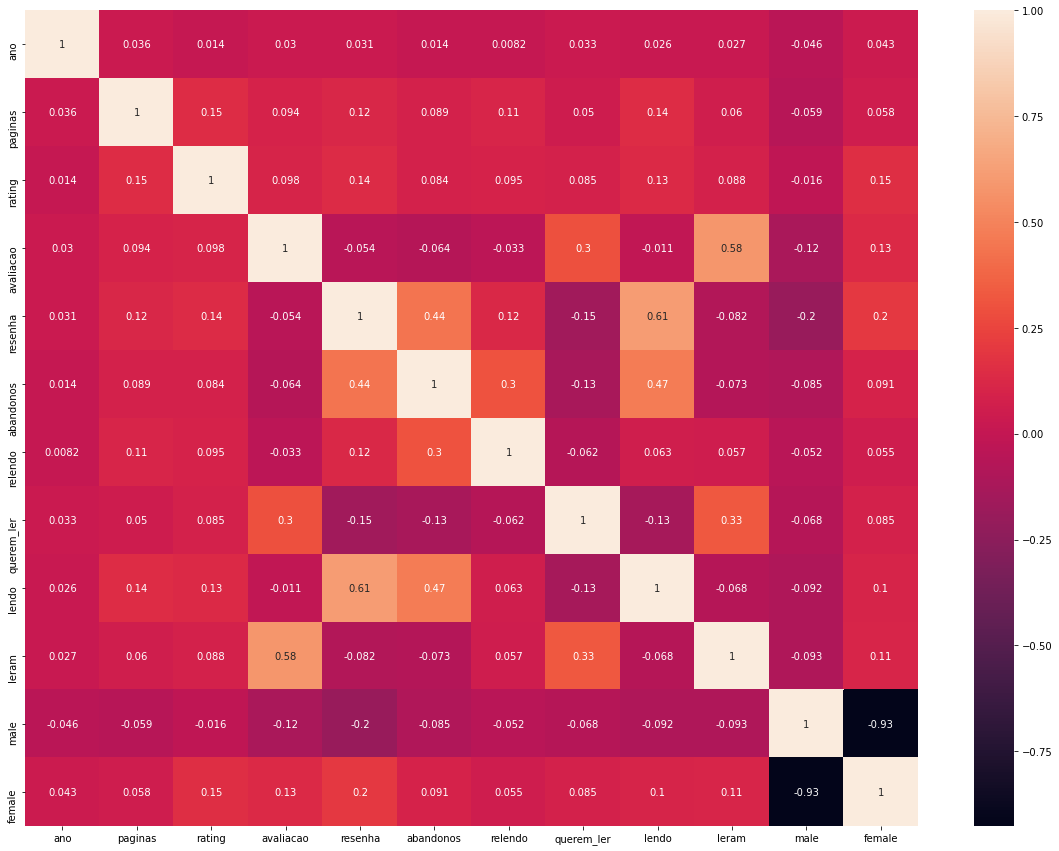

In [12]:
corr_df = dados.corr(method='pearson')

plt.figure(figsize=(20,15))
sns.heatmap(corr_df, annot=True)
plt.show()

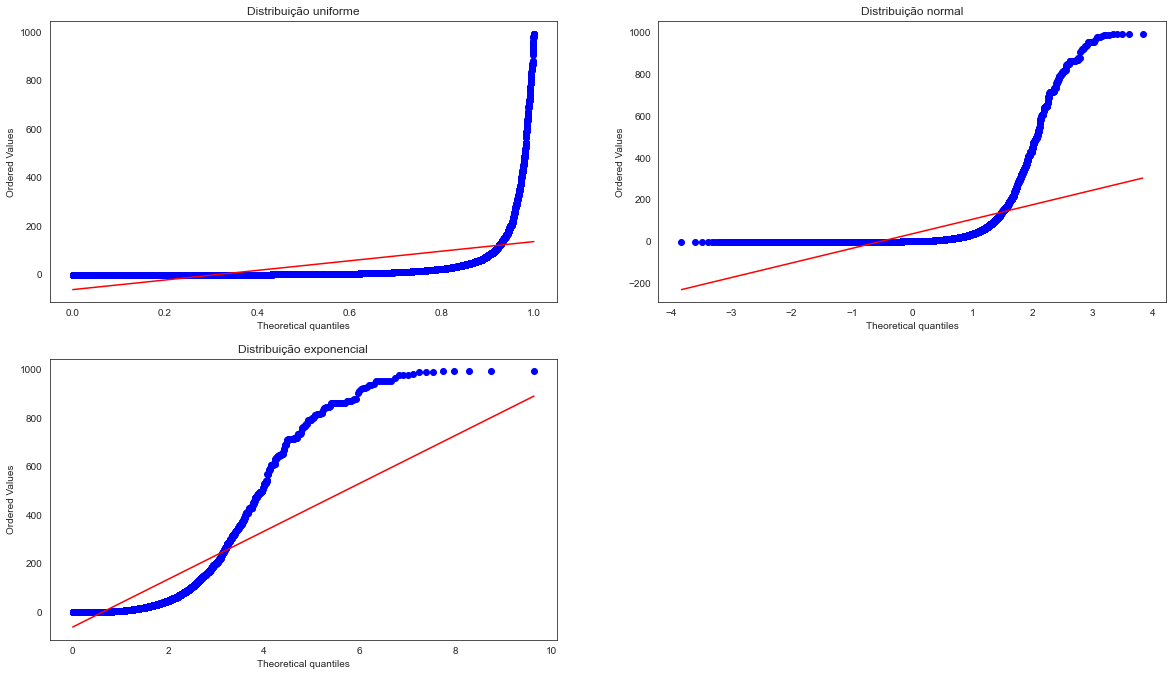

In [55]:
plt.figure(figsize=(20,30))
plt.subplot(521)

stats.probplot(dados.abandonos, dist = 'uniform', plot = plt);
plt.title('Distribuição uniforme')

plt.subplot(522)
stats.probplot(dados.abandonos, dist = 'norm', plot = plt);
plt.title('Distribuição normal')

plt.subplot(523)
stats.probplot(dados.abandonos, dist = 'expon', plot = plt);
plt.title('Distribuição exponencial')
plt.show()

**Como é possível de ser visualizado nos gráficos da distribuição normal, uniforme e exponencial acima, a nossa target não segue nenhum entre os modelo de distribuição propostos.**

## Parte B- Minerando Dados as Características do Dataset 

Aqui extraímos a coluna  anos do nosso data frame e colocamos dentro de uma lista para analisar que anos temos no data frame

In [13]:
#verificando os anos pertercentes a coluna anos no dataFrame 
lista=[]
anos=dados.ano
for ano in anos: 
    if ano not in lista: 
        lista.append(ano)
print(lista)
# autor=dados.autor
# print(autor)


[2021, 2020, 2019, 2018, 2017, 2016, 2015, 2009, 2014, 2013, 2012, 2011, 2010, 2008, 2007, 2006, 2005, 2004, 2003, 1969, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1988, 1938, 0, 1994, 1993, 1992, 1991, 1990, 1989, 1987, 1986, 1985, 1982, 1981, 1980, 1978, 1977, 1976, 1975, 1973, 1967, 1965, 1956, 1954, 1941, 1983, 1979, 1962, 1961, 1950, 1931, 1884, 1966]


Aqui extraímos a coluna  "Gênero" do nosso data frame e colocamos dentro de uma lista para analisar quais gêneros de livros temos no data frame e sua quantidade.

In [14]:
lista=[]
for gen in dados.genero: 
    if gen not in lista: 
        lista.append(gen)
# print(lista)

In [15]:
dados.value_counts(normalize=True)
base=dados.groupby(["genero"]).abandonos.mean().sort_values(ascending=False).head(10)
dados.groupby(["genero"]).abandonos.mean().sort_values(ascending=False).head(10)

genero
Autoajuda / Literatura Brasileira / Romance                                                                989.0
Fantasia / Infantojuvenil / Literatura Estrangeira / Aventura / Ficção / Romance / Suspense e Mistério     954.0
Aventura / Fantasia / Infantojuvenil / Literatura Estrangeira / Ficção / Romance / Suspense e Mistério     954.0
Contos / Ficção / Literatura Estrangeira / Aventura                                                        937.0
Ficção / Literatura Estrangeira / Suspense e Mistério / Terror / Cinema / Romance / Drama / Horror         928.0
Ficção / Filosofia / Literatura Estrangeira / Poemas, poesias / Romance                                    905.0
]Horror / Suspense e Mistério / Ficção / Literatura Estrangeira                                            880.0
Literatura Estrangeira / Ficção / Distopia / Infantojuvenil                                                877.0
 Artes / Literatura Estrangeira / Não-ficção                                             

In [16]:
# lista_genero=['Autoajuda / Literatura Brasileira / Romance ', 'Fantasia / Infantojuvenil / Literatura Estrangeira / Aventura / Ficção / Romance / Suspense e Mistério', 'Aventura / Fantasia / Infantojuvenil / Literatura Estrangeira / Ficção / Romance / Suspense e Mistério', 'Contos / Ficção / Literatura Estrangeira / Aventura','Ficção / Literatura Estrangeira / Suspense e Mistério / Terror / Cinema / Romance / Drama / Horror','Ficção / Filosofia / Literatura Estrangeira / Poemas, poesias / Romance','Horror / Suspense e Mistério / Ficção / Literatura Estrangeira','Literatura Estrangeira / Ficção / Distopia / Infantojuvenil','Artes / Literatura Estrangeira / Não-ficção ']
# base2=dados.groupby(["genero"]).abandonos.mean().sort_values(ascending=False).head(9)
# dados.groupby(["editora"]).abandonos.mean().sort_values(ascending=False).head(9)

# lista_valores= []
# for gen in base2: 
#     lista_genero.append(gen)


# #criando gráfico de pizza 
# print(len(lista_genero))
# explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
# plt.figure(figsize=(9, 7))
# plt.title('Porcentagem de abandono entre as 9 classes de gênero com o maior índice')
# plt.pie(lista_valores, explode=explode, labels=lista_genero, autopct='%1.1f%%', shadow=True, startangle=90)
# plt.legend(lista_genero, bbox_to_anchor=(1.3,1), loc='upper right')
# plt.axis('equal')
# plt.tight_layout()
# plt.show()

In [17]:
lista=[]
abandonos=dados.abandonos
for ab in abandonos: 
    if ab not in lista: 
        lista.append(ab)

* ### Variáveis Qualitativas- Tabelas cruzadas


Aqui extraímos a coluna  "Resenha" do nosso data frame e colocamos dentro de uma lista para analisar quais resenhas de livros temos no data frame e sua quantidade.

In [18]:
lista=[]
for res in dados.resenha: 
    if res not in lista: 
        lista.append(res)
        
# print(lista)

Aqui estamos analisando a quantidade de abandonos pelo número de resenhas dos livros que apareceram com maior índice, como mostrado na matriz de confusão e fazendo um cruzamento entre as duas variáveis quantitativas.

In [19]:
dados.value_counts(normalize=True)
base=dados.groupby(["resenha"]).abandonos.mean().sort_values(ascending=False).head(10)
dados.groupby(["resenha"]).abandonos.mean().sort_values(ascending=False).head(10)

resenha
583    989.0
659    979.0
506    880.0
452    862.0
301    835.0
930    816.0
817    813.0
338    807.0
367    791.0
217    789.0
Name: abandonos, dtype: float64

In [20]:
# lista=[]
# for des in dados.descricao: 
#     if des not in lista: 
#         lista.append(des)
        
# # print(lista)

Aqui extraímos a coluna  "autor" do nosso data frame e colocamos dentro de uma lista para analisar quais autores de livros temos no data frame e sua quantidade.

In [21]:
lista=[]
for a in dados.autor: 
    if a not in lista: 
        lista.append(a)
        
# print(lista)

In [22]:
data = dados.loc[dados['autor'] == 'Kate Elizabeth Russell','abandonos']
data

1    48
Name: abandonos, dtype: int64

In [23]:
dados.value_counts(normalize=True)
base=dados.groupby(["autor"]).abandonos.mean().sort_values(ascending=False).head(10)
dados.groupby(["autor"]).abandonos.mean().sort_values(ascending=False).head(10)


autor
Thomas Bulfinch        937.000000
Friedrich Nietzsche    905.000000
Almeida Garrett        608.000000
Nancy Jo Sales         589.000000
Timur Vermes           460.000000
Isabela Freitas        423.625000
Arthur Golden          420.000000
Alyson Noël            417.105263
Jonathan Swift         414.000000
Esther Earl            410.000000
Name: abandonos, dtype: float64

Aqui estamos analisando a quantidade de abandonos do livro pelos 10 autores que mais apareceram no data frame

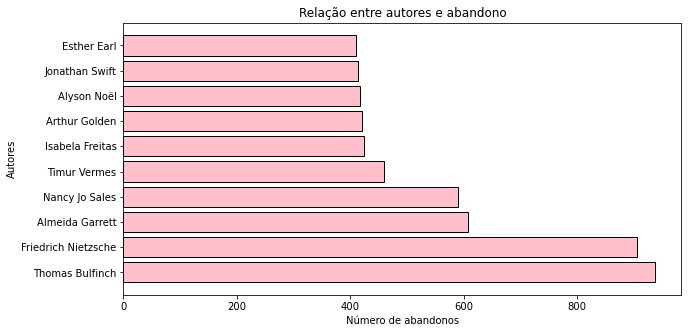

In [24]:
lista_names = ['Thomas Bulfinch', 'Friedrich Nietzsche','Almeida Garrett', 'Nancy Jo Sales', 'Timur Vermes', 'Isabela Freitas','Arthur Golden','Alyson Noël', 'Jonathan Swift', 'Esther Earl']
lista_valores= []
for i in base: 
    lista_valores.append(i)
    
plt.figure(figsize=(10, 5))

plt.barh(lista_names, lista_valores, color='pink', edgecolor='black')

plt.title("Relação entre autores e abandono")
plt.xlabel('Número de abandonos')
plt.ylabel("Autores")
plt.show()

Percebe-se pelo gráfico acima que o autor maior número de abandonados pertencem ao autor Thomas Bulfinch . Assim, sendo ele referência em assuntos mitológicos, podemos assumir como hipótese que a juventude do século XXI não tem muito interesse por esses assuntos, o que fez com que o número de abandonos fosse auto.

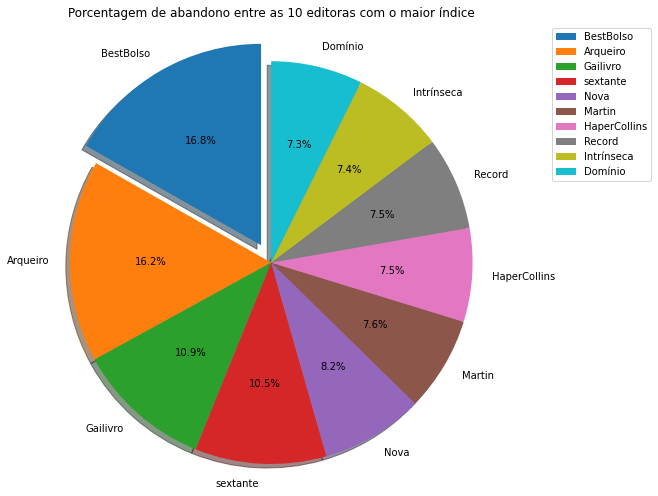

In [25]:
#crossTab é apenas para qualitativas

lista_editoras=['BestBolso', 'Arqueiro', 'Gailivro', 'sextante','Nova','Martin','HaperCollins','Record','Intrínseca','Domínio']
base2=dados.groupby(["editora"]).abandonos.mean().sort_values(ascending=False).head(10)
dados.groupby(["editora"]).abandonos.mean().sort_values(ascending=False).head(10)

lista_valores= []
for i in base: 
    lista_valores.append(i)


#criando gráfico de pizza 

explode=(0.1,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(9, 7))
plt.title('Porcentagem de abandono entre as 10 editoras com o maior índice')
plt.pie(lista_valores, explode=explode, labels=lista_editoras, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(lista_editoras, bbox_to_anchor=(1.3,1), loc='upper right')
plt.axis('equal')
plt.tight_layout()
plt.show()

Percebe-se pelo gráfico acima que as editoras com maior índice de abandonados são a BestBolso e Arqueiro. Assim, assumiremos como hipótese que elas não agradam muito o público leitor, seja pelo seu material, tradução ou escrita. 

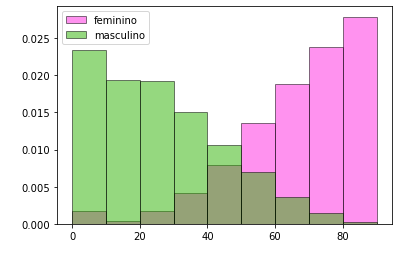

In [26]:
fem=dados.female
peso=dados['abandonos']
plt.hist(dados.female, bins=range(0,100,10), alpha=0.5, color='#FF26E1', edgecolor='black', label='feminino', density=True)
plt.hist(dados.male, bins=range(0,100,10), alpha=0.5, color='#2DB200', edgecolor='black', label='masculino', density=True)
plt.legend()
plt.xlabel(" ")
plt.ylabel(" ")
plt.title("")
plt.show()

## Análise das features quantitativas

C:\Users\taina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


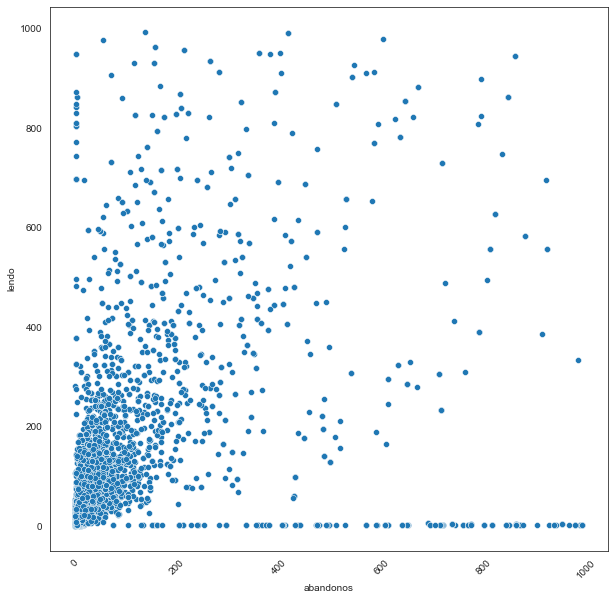

In [27]:
sns.set_style('white')

plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.scatterplot(dados.abandonos, dados.lendo)
plt.show()

No gráfico de dispersão acima,consideramos, hipoteticamente, no início, que os livros que estavam sendo lidos estavam sendo abandonados na mesma proporção por não terem agradado ao público.

In [28]:
valor=dados['abandonos'].corr(dados['lendo'])
print('A correlação entre a target abandono com a feature lendo é de {}'.format(valor))

A correlação entre a target abandono com a feature lendo é de 0.4695600175356676


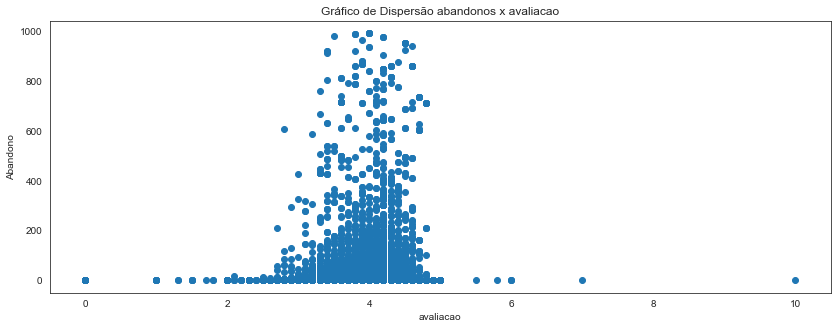

In [29]:
plt.figure(figsize=(14,5))
plt.scatter(dados['rating'],dados['abandonos'])
plt.title('Gráfico de Dispersão abandonos x avaliacao')
plt.xlabel('avaliacao')
plt.ylabel('Abandono')
plt.show()

Fazendo uma hipótese sobre o gráfico acima, podemos considerar que no início o índice de abandono foi baixo pois, o livro foi considerado ruim por algum motivo e, devido a isso, poucos usuários iniciaram sua leitura, já no meio, podemos considerar que índice de abandono foi alto pois, como estava na média, o índice de adesão foi alto, mas não agradou ao público e, no final , como ele foi bem avaliado, teve baixo abandono.

In [30]:
valor=dados['rating'].corr(dados['abandonos'])
print('A correlação entre a target abandono com a feature avaliacao é de {}'.format(valor))

A correlação entre a target abandono com a feature avaliacao é de 0.0836762497568402


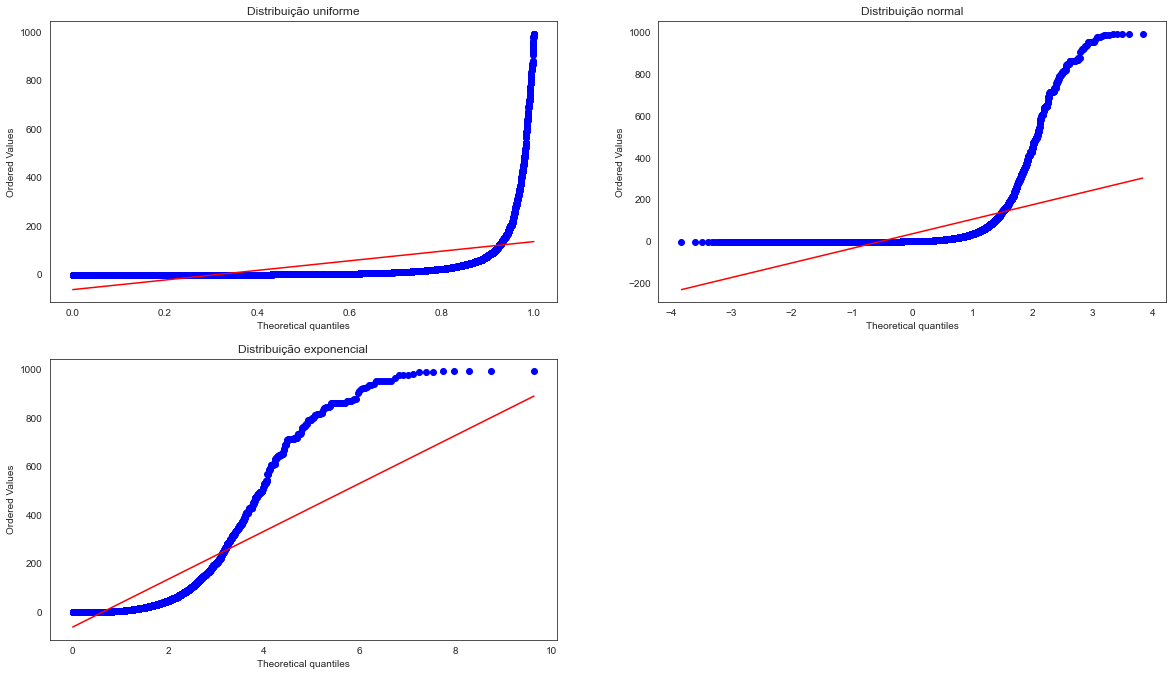

### Gráficos de Histograma:
Para uma maior análise a respeito das features da base de dados, plotamos alguns histogramas.

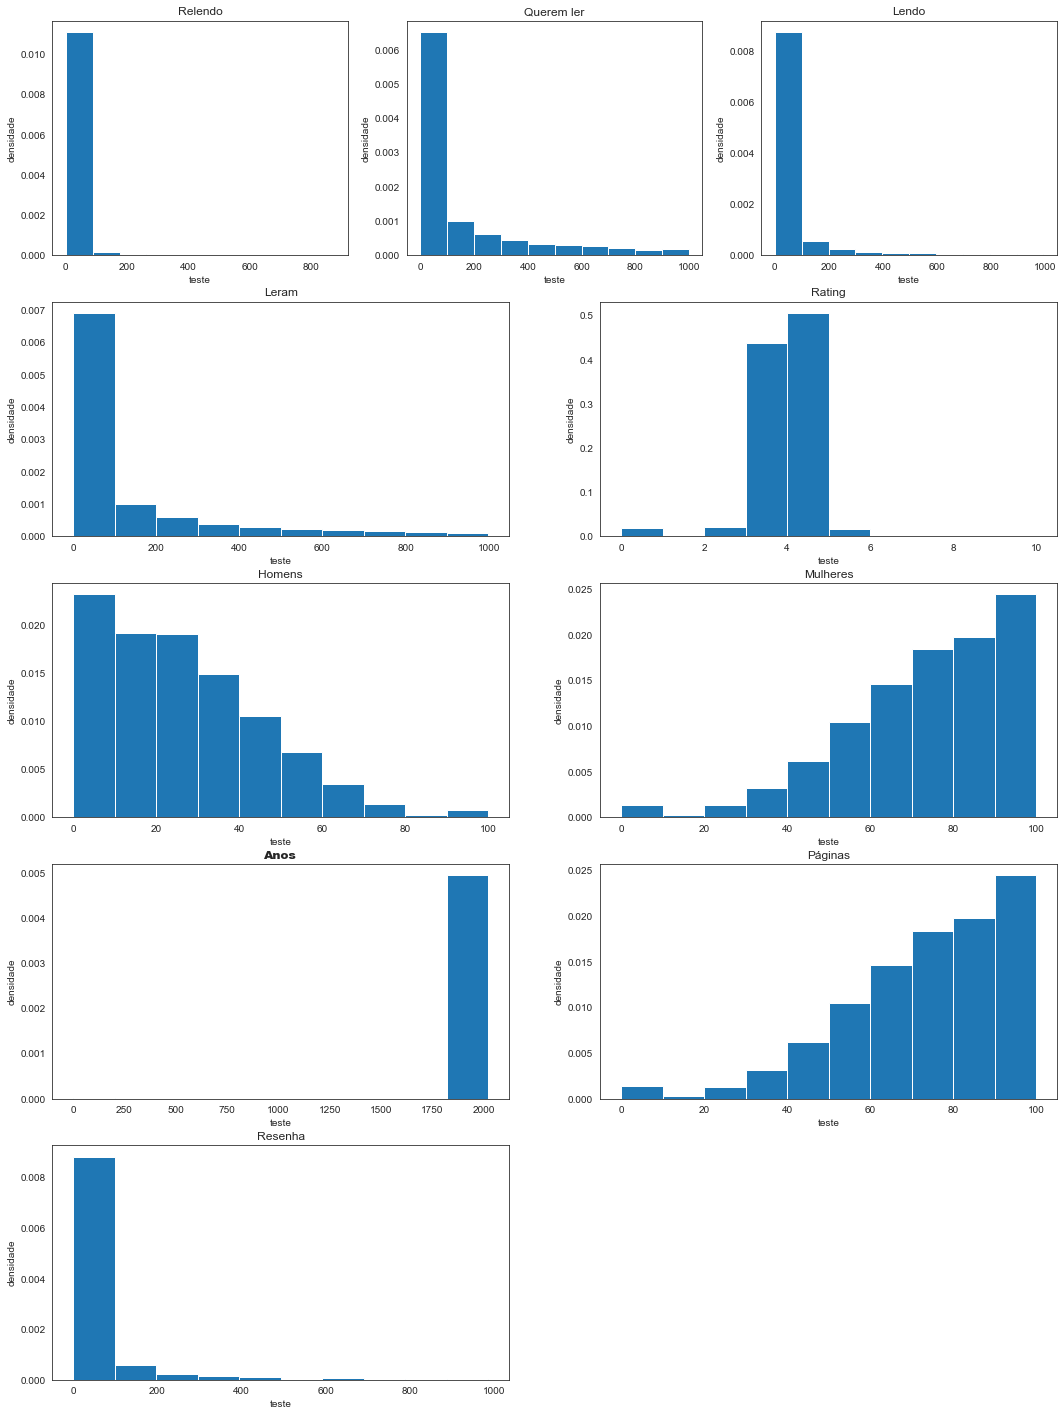

In [32]:
plt.figure(figsize=(18,25))
plt.subplot(521)
plt.hist(dados.avaliacao, density=True, edgecolor="white")
plt.title('avaliações', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('teste')

plt.subplot(522)
plt.hist(dados.abandonos, density=True, edgecolor="white")
plt.title('abandonos', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('teste')

plt.subplot(523)
plt.hist(dados.leram, density=True, edgecolor="white")
plt.title('Leram', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('teste')

plt.subplot(524)
plt.hist(dados.rating, density=True, edgecolor="white")
plt.title('Rating', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('teste')

plt.subplot(525)
plt.hist(dados.male, density=True, edgecolor="white")
plt.title('Homens', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('teste')

plt.subplot(526)
plt.hist(dados.female, density=True, edgecolor="white")
plt.title('Mulheres', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('teste')

plt.subplot(527)
plt.hist(dados.ano, density=True, edgecolor="white")
plt.title('Anos', fontweight = 1000)
plt.ylabel('densidade')
plt.xlabel('teste')

plt.subplot(528)
plt.hist(dados.female, density=True, edgecolor="white")
plt.title('Páginas', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('teste')

plt.subplot(529)
plt.hist(dados.resenha, density=True, edgecolor="white")
plt.title('Resenha', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('teste')

plt.subplot(531)
plt.hist(dados.relendo, density=True, edgecolor="white")
plt.title('Relendo', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('teste')

plt.subplot(532)
plt.hist(dados.querem_ler, density=True, edgecolor="white")
plt.title('Querem ler', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('teste')

plt.subplot(533)
plt.hist(dados.lendo, density=True, edgecolor="white")
plt.title('Lendo', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('teste')

plt.show()

A partir dos histogramas acima é possível observar:
<ul> <li> Relendo tem assimetria a direita</li>
    <li> Querem ler tem assimetria a direita</li>
    <li> Lendo tem assimetria a direita</li>
    <li> Leram tem assimetria a direita</li>
    <li> Rating foi inconclusivo</li>
    <li> Relendo tem assimetria a direita</li>
    <li> Homens tem assimetria a direita</li>
    <li> Mulheres tem assimetria a esquerda</li>
    <li> Relendo tem assimetria a direita</li>
    <li> Anos tem simetria</li>
    <li> Relendo tem assimetria a direita</li>
    <li> Páginas tem assimetria a esquerda</li>
    <li> Resenha tem assimetria a direita</li>
    
</ul>

## regressão linear

<ul> 
   <li> Preparando a base para a regressão linear</li> 
    </ul> 

In [33]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


X=dados[feature_columns]
Y=dados.abandonos
feature_columns=['rating', 'lendo','relendo','querem_ler','ano','paginas','male','female']
x_train, x_test, y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=42)


- Modelo 1 - Regressão Linear pelo statsmodels.api

In [34]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results


results = regress(Y,X)
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              abandonos   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     566.8
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:16:57   Log-Likelihood:                -64015.
No. Observations:               10642   AIC:                         1.280e+05
Df Residuals:                   10633   BIC:                         1.281e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4036     35.252     -0.040      0.968     -70.504      67.697
rating        -0.1631      1.489     -0.110      0.913      -3.083       2.756
lendo          0.4047      0.008     52.656      0.000       0.390       0.420
relendo        0.5256      0.016     32.670      0.000       0.494       0.557
querem_ler    -0.0282      0.004     -6.727      0.000      -0.036      -0.020
ano            0.0010      0.016      0.062      0.951      -0.031       0.033
paginas       -0.0015      0.006     -0.250      0.803      -0.013       0.010
male          -0.0057      0.140     -0.041      0.968      -0.280       0.268
female         0.2132      0.136      1.564      0.118      -0.054       0.480
==============================================================================
Omnibus:                     9955.463   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           524145.635
Skew:                           4.459   Prob(JB):                         0.00
Kurtosis:                      36.204   Cond. No.                     7.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
print("Coefficient of determination (r²):0.299") 


Coefficient of determination (r²):0.299


- Modelo 2 - Regressão Linear pelo sklearn

In [36]:
import sklearn 
from sklearn.metrics import mean_squared_error, r2_score


regr = sklearn.linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred=regr.predict(x_test)
print("Os coeficientes referentes a cada uma das features dispostas em relação a target é de: \n", regr.coef_)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

print("Coefficient of determination (r²): %.2f" % r2_score(y_test, y_pred))

#plt.scatter(x_test['querem_ler'], y_test, color="black")
#plt.plot(x_test, y_pred, color="blue")
#plt.xticks(())
#plt.yticks(())
#plt.show()

Os coeficientes referentes a cada uma das features dispostas em relação a target é de: 
 [-0.86926198  0.4203435   0.4849476  -0.02476429 -0.00356864 -0.00233435
  0.00983119  0.21338725]
Mean squared error: 11094.87
Coefficient of determination (r²): 0.28


***Uma vez que um modelo ideal para se realizar a previsão de uma target é equivalente a 1. Os modelos de regressão linear, utilizados acima com o uso do método sklearn e  statsmodels.api obtiveram um r² de 0.28 e 0.299 respectivamente, não se mostrando suficientementes adequados para realizar uma previsão. Iremos partir assim para um novo método.***

## regression tree

In [33]:
x_train, x_test, y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

Acurracy
0.6960195952837954

0.828169633907673


C:\Users\leand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


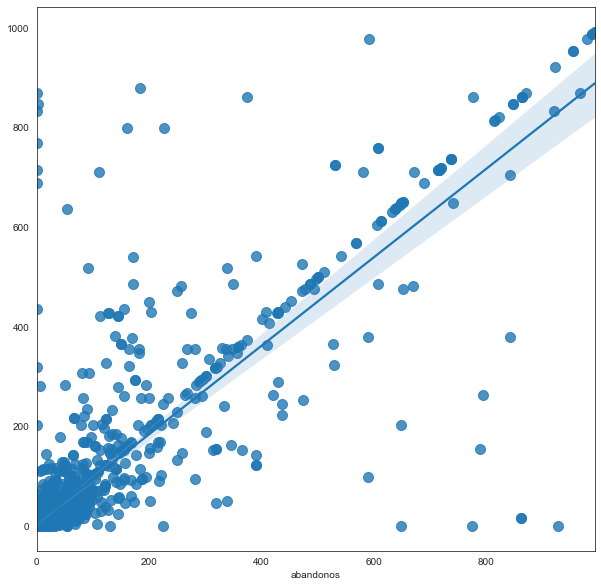

In [34]:
model=DecisionTreeRegressor()
model.fit(x_train, y_train)

expect_y=y_test
predict_y=model.predict(x_test)


print("Acurracy");print(metrics.r2_score(expect_y,predict_y))
print();print(metrics.mean_squared_log_error(expect_y, predict_y))


plt.figure(figsize=(10,10))
sns.regplot(expect_y, predict_y, scatter_kws={"s": 100} )
plt.show()

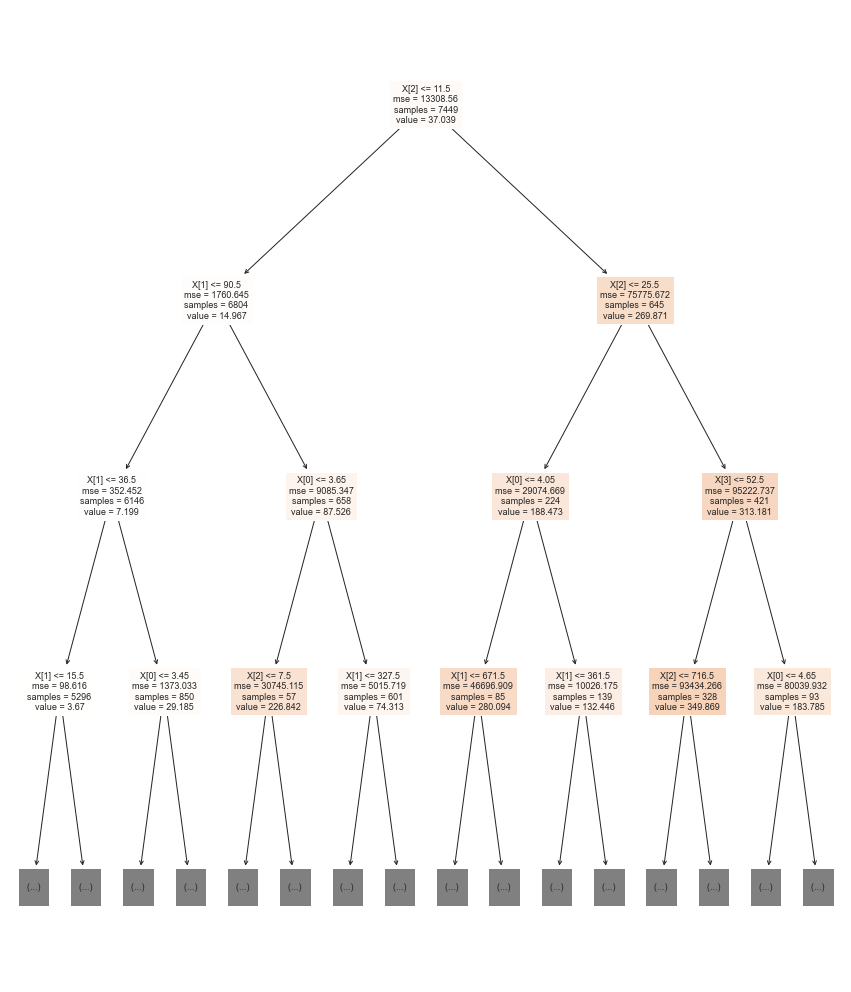

In [35]:
%matplotlib inline
plt.figure(figsize=(15,18))
tree.plot_tree(model,fontsize=9,filled=True,max_depth=3);

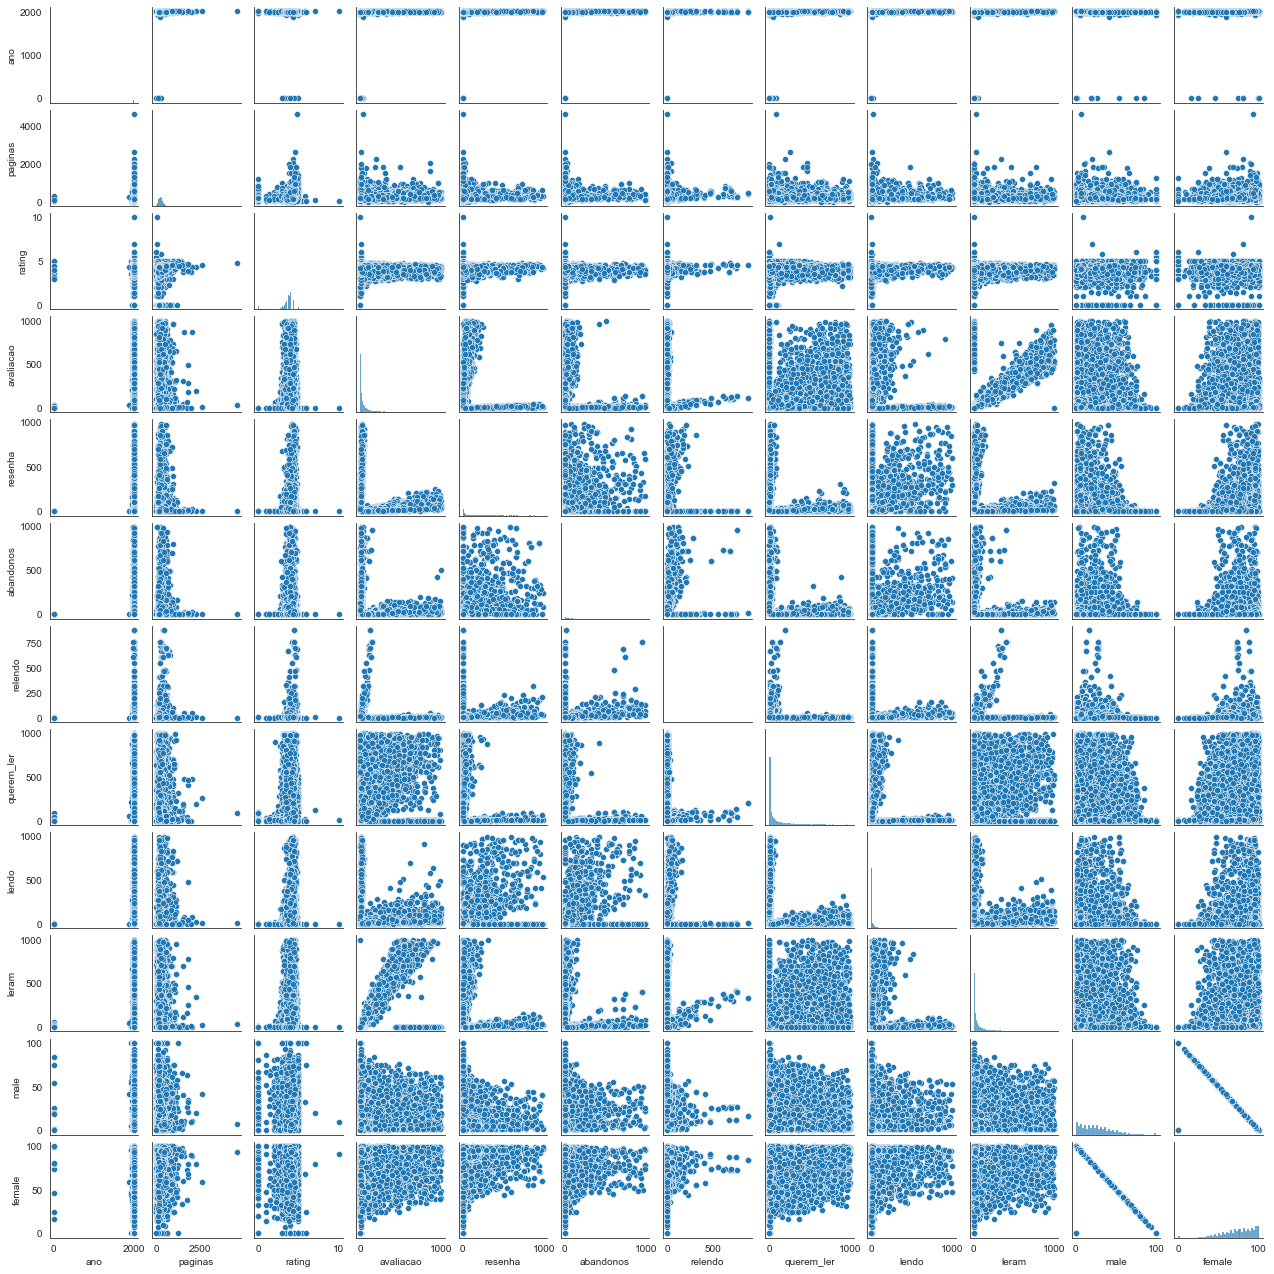

In [77]:
#sns.pairplot(dados, height=1.5)
sns.pairplot(dados, height=1.5);

## Referências:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.feature_importances_ 

https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson

https://pt.wikipedia.org/wiki/Thomas_Bulfinch